In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('breast-cancer-wisconsin-data1.csv', na_values = ['NULL', '?', 'NONE', ' '])

In [3]:
df.head(10)

,ID,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     699 non-null    int64  
 1   clump_thickness        699 non-null    int64  
 2   uniformity_cell_size   699 non-null    int64  
 3   uniformity_cell_shape  699 non-null    int64  
 4   marginal_adhesion      699 non-null    int64  
 5   single_epi_cell_size   699 non-null    int64  
 6   bare_nuclei            683 non-null    float64
 7   bland_chromatin        699 non-null    int64  
 8   normal_nucleoli        699 non-null    int64  
 9   mitoses                699 non-null    int64  
 10  class                  699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [6]:
df.columns

Index(['ID', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion', 'single_epi_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
       'class'],
      dtype='object')

In [7]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [8]:
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1071704.10,617095.73,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.42,2.82,1.0,2.0,4.0,6.0,10.0
uniformity_cell_size,699.0,3.13,3.05,1.0,1.0,1.0,5.0,10.0
uniformity_cell_shape,699.0,3.21,2.97,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.81,2.86,1.0,1.0,1.0,4.0,10.0
single_epi_cell_size,699.0,3.22,2.21,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.54,3.64,1.0,1.0,1.0,6.0,10.0
bland_chromatin,699.0,3.44,2.44,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.87,3.05,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.59,1.72,1.0,1.0,1.0,1.0,10.0


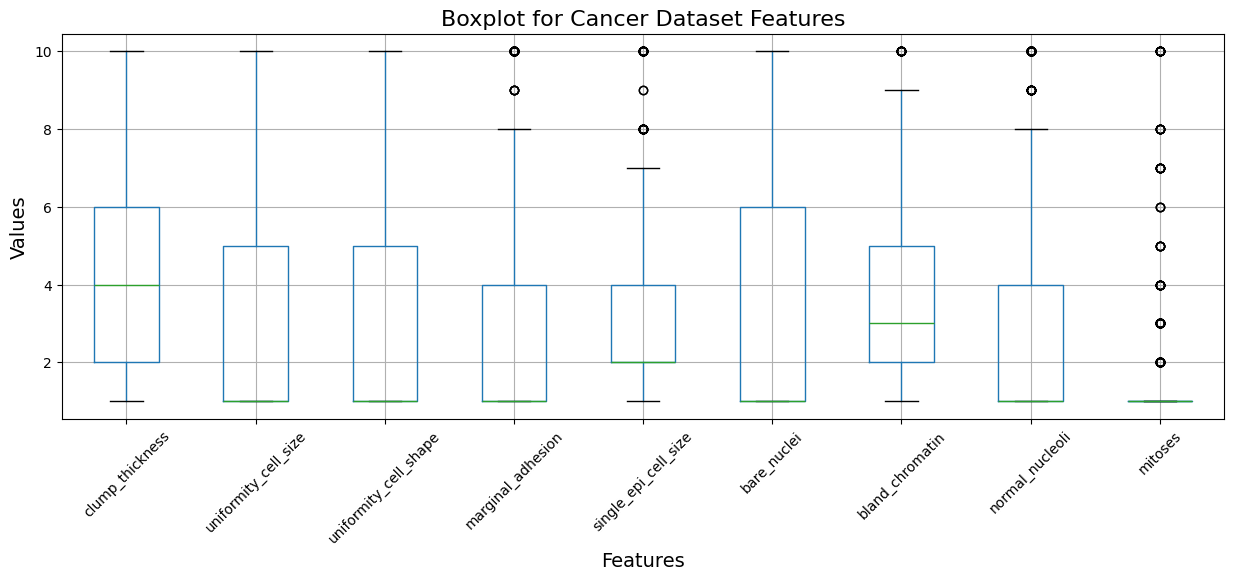

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))
df.boxplot(column=['clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion', 'single_epi_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses'], ax=ax)

ax.set_title('Boxplot for Cancer Dataset Features', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Values', fontsize=14)

plt.xticks(rotation=45)

plt.show()

In [10]:
class_counts = df['class'].value_counts()
class_counts

class
2    458
4    241
Name: count, dtype: int64

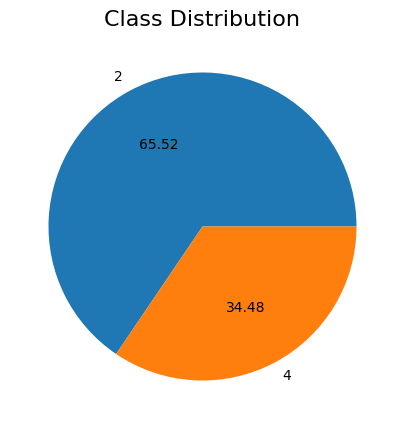

In [11]:
plt.figure(figsize=(5,5))
plt.pie(class_counts, labels=class_counts.index, autopct='%.2f')

plt.title('Class Distribution', fontsize=16)

plt.show()

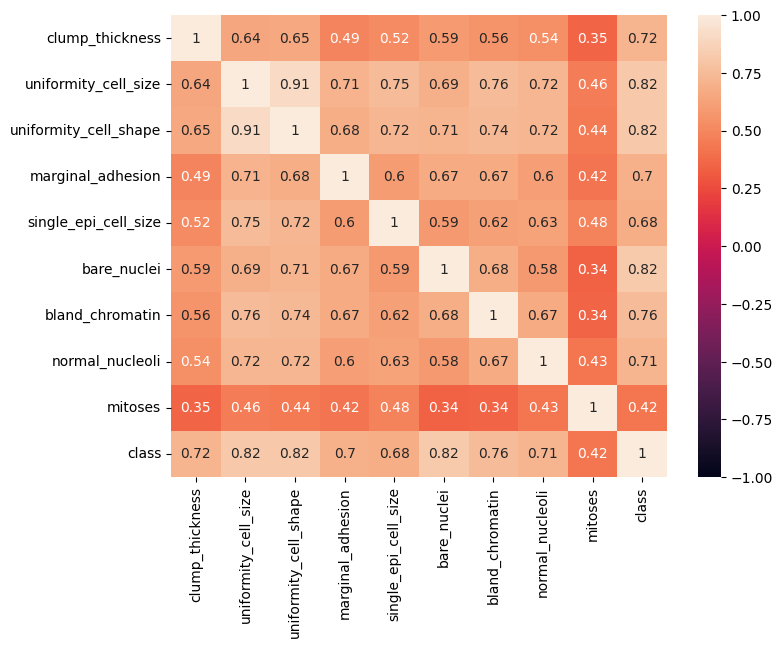

In [12]:
corr= df[df.columns[1:]].corr()

plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

plt.show()

In [13]:
df['class'] = df['class'].replace({2:0, 4:1})

print(df['class'].unique())

[0 1]


In [14]:
X = df[['uniformity_cell_shape', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli']]
y = df['class']

In [15]:
missing_values = X.isnull().sum()
print(missing_values)

uniformity_cell_shape     0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
dtype: int64


In [16]:
mean_bare_nuclei = X['bare_nuclei'].mean()
X['bare_nuclei'].fillna(mean_bare_nuclei, inplace=True)

print(X.isnull().sum())

uniformity_cell_shape    0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
dtype: int64


C:\Users\37148\AppData\Local\Temp\ipykernel_18644\352261858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bare_nuclei'].fillna(mean_bare_nuclei, inplace=True)


In [17]:
from scipy import stats

#set 3 as the threshold for the Z-score
threshold = 3

#calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(X[['bland_chromatin', 'normal_nucleoli']]))

#find the indices of the data points with a Z-score greater than the threshold
outlier_indices = (z_scores > threshold).any(axis=1)

#filter the DataFrame to exclude the outliers
X_new = X[~outlier_indices]

#check the number of removed outliers
print("Number of removed outliers:", np.sum(outlier_indices))
print("Shape of X_new:", X_new.shape)

Number of removed outliers: 0
Shape of X_new: (699, 4)


In [18]:
# apply SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_res, y_res = sm.fit_resample(X_new, y)

#check the new class distribution
print(pd.Series(y_res).value_counts())

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print('Balanced X:', X_res.shape, '''\nBalanced Y:''', y_res.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=77)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

In [ ]:
import pickle
with open('breast_cancer.pkl', 'wb') as file:
    pickle.dump(model, file)